<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/AI_Music_Composition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. State Management
2. Language Model: Employs LLAMA-3.3 Model generating musical components.
3. Music Functions:
  - Melody Generator
  - Harmony Creator
  - Rhythm Analyzer
  - Style Adapter
4. MIDI Conversion
5. LangGraph Workflow
6. Playback Functionality

In [1]:
!pip install langchain langchain_core langchain_community langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: langchain_core
    Found existing installation: langchain-core 0.3.25
    Uninstalling langchain-core-0.3.25:
      Successfully uninstalled langchain-core-0.3.25
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.12
    Uninstalling langchain-0.3.12:
      Successfully uninstalled langchain-0.3.12


In [2]:
!pip install langchain_groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 4.7 MB/s eta 0:00:00


In [3]:
from typing import TypedDict, Dict
from langgraph.graph import StateGraph, END
from langchain.prompts import ChatPromptTemplate
import music21
import tempfile
import random

In [4]:
class MusicState(TypedDict):
    musician_input:str
    melody: str
    harmony: str
    rhythm: str
    style: str
    composition:str
    midi_file:str

In [6]:
from langchain_groq import ChatGroq
from google.colab import userdata
import os

os.environ["GROQ_API_KEY"]=userdata.get("groq_api_key")
llm=ChatGroq(
    temperature=0,
    model_name="llama-3.3-70b-versatile"
)
result = llm.invoke("What is music?")
print(result.content)

Music is a universal language that has been a part of human culture for thousands of years. It is a form of artistic expression that uses sound and silence to convey emotions, ideas, and experiences. Music can be defined as:

1. **An arrangement of sounds**: Music is created by combining different sounds, such as melodies, harmonies, rhythms, and timbres, to produce a unique auditory experience.
2. **A form of communication**: Music can express emotions, tell stories, and convey messages, making it a powerful tool for communication and connection.
3. **A cultural phenomenon**: Music is shaped by social, historical, and cultural contexts, reflecting the values, traditions, and experiences of different communities and societies.
4. **A creative expression**: Music is an art form that allows individuals to express themselves, their thoughts, and their feelings through composition, performance, and improvisation.

Music can take many forms, including:

* **Vocal music**: Singing, chanting,

In [18]:
def melody_generator(state:MusicState)->Dict:
  prompt = ChatPromptTemplate.from_template(
      """
      Generate a melody based on this input: {input}. Represent it as a string of notes in music21 format.
      """
  )
  chain = prompt | llm
  melody = chain.invoke({"input":state["musician_input"]})
  return {"melody":melody.content}

def harmony_creator(state:MusicState)->Dict:
  prompt = ChatPromptTemplate.from_template(
      """
      Create a harmony based on this melody: {melody}. Represent it as a string of chords  in music21 format.
      """
  )
  chain = prompt | llm
  harmony = chain.invoke({"melody":state["melody"]})
  return {"harmony":harmony.content}

def rhythm_analyzer(state:MusicState)->Dict:
  prompt = ChatPromptTemplate.from_template(
      """
      Analyze and suggest a rythm for this melody and harmony: {melody} {harmony}. Represent it as a string of durations in music21 format.
      """
  )
  chain = prompt | llm
  rhythm = chain.invoke({"melody":state["melody"],"harmony":state["harmony"]})
  return {"rhythm":rhythm.content}

def style_adapter(state:MusicState)->Dict:
  prompt = ChatPromptTemplate.from_template(
      "Adapt this composition to the {style} style, Melody: {melody}, Harmony: {harmony}, Rhythm: {rhythm}. Provide the result in music 21 format."
  )
  chain = prompt | llm
  adapted = chain.invoke(
      {
          "style":state["style"],
          "melody":state["melody"],
          "harmony":state["harmony"],
          "rhythm":state["rhythm"]
      }
  )

  return {"composition":adapted.content}

In [36]:
def midi_converter(state: MusicState) -> Dict:
    piece = music21.stream.Score()
    description = music21.expressions.TextExpression(state["composition"])
    piece.append(description)

    scales = {
        'C major': ['C', 'D', 'E', 'F', 'G', 'A', 'B'],
        'D major': ['D', 'E', 'F#', 'G', 'A', 'B', 'C#'],
        'E major': ['E', 'F#', 'G#', 'A', 'B', 'C#', 'D#'],
        'F major': ['F', 'G', 'A', 'Bb', 'C', 'D', 'E'],
        'G major': ['G', 'A', 'B', 'C', 'D', 'E', 'F#'],
        'A major': ['A', 'B', 'C#', 'D', 'E', 'F#', 'G#'],
        'B major': ['B', 'C#', 'D#', 'E', 'F#', 'G#', 'A#'],
        'C# major': ['C#', 'D#', 'E#', 'F#', 'G#', 'A#', 'B#'],
        'D# major': ['D#', 'E#', 'F#', 'G#', 'A#', 'B', 'C#'],
        'F# major': ['F#', 'G#', 'A#', 'B', 'C#', 'D#', 'E#'],
        'G# major': ['G#', 'A#', 'B#', 'C#', 'D#', 'E#', 'F##'],
        'A# major': ['A#', 'B#', 'C##', 'D#', 'E#', 'F##', 'G##'],
        'Bb major': ['Bb', 'C', 'D', 'Eb', 'F', 'G', 'A'],
        'Eb major': ['Eb', 'F', 'G', 'Ab', 'Bb', 'C', 'D'],
        'C minor': ['C', 'D', 'Eb', 'F', 'G', 'Ab', 'Bb'],  # Added C minor scale
        'D minor': ['D', 'E', 'F', 'G', 'A', 'Bb', 'C'],  # Added D minor scale
        'E minor': ['E', 'F#', 'G', 'A', 'B', 'C', 'D'],  # Added E minor scale
        'F minor': ['F', 'G', 'Ab', 'Bb', 'C', 'Db', 'Eb'],  # Added F minor scale
        # Add more minor scales as needed
    }
    chords = {
        'C major': ['C4', 'E4', 'G4'],
        'D major': ['D4', 'F#4', 'A4'],
        'E major': ['E4', 'G#4', 'B4'],
        'F major': ['F4', 'A4', 'C5'],
        'G major': ['G4', 'B4', 'D5'],
        'A major': ['A4', 'C#5', 'E5'],
        'B major': ['B4', 'D#5', 'F#5'],
        'C# major': ['C#4', 'F4', 'G#5'],
        'D# major': ['D#4', 'G4', 'A#5'],
        'F# major': ['F#4', 'A#4', 'C#5'],
        'G# major': ['G#4', 'C5', 'D#5'],
        'A# major': ['A#4', 'D5', 'F5'],
        'Bb major': ['Bb4', 'D5', 'F5'],
        'Eb major': ['Eb4', 'G4', 'Bb5'],
        'F major': ['F4', 'A4', 'C5'],
        'C minor': ['C4', 'Eb4', 'G4'],  # Added C minor chord
        'D minor': ['D4', 'F4', 'A4'],  # Added D minor chord
        'E minor': ['E4', 'G4', 'B4'],  # Added E minor chord
        'F minor': ['F4', 'Ab4', 'C5'],  # Added F minor chord
        # Add more minor chords as needed
    }

    def create_melody(scale_name, duration):
      melody = music21.stream.Part()
      scale = scales[scale_name]  # Corrected
      for i in range(duration):
          note = music21.note.Note(random.choice(scale) + '4')
          note.quarterLength = 1
          melody.append(note)
      return melody

    def create_chord_progression(duration):
      harmony = music21.stream.Part()
      for i in range(duration):
        chord_name = random.choice(list(chords.keys()))
        chord = music21.chord.Chord(chords[chord_name])
        chord.quarterLength = 1
        harmony.append(chord)
      return harmony

    user_input = state["musician_input"].lower()

    if 'minor' in user_input:
      scale_name = 'C minor'
    elif 'major' in user_input:
      scale_name = 'C major'
    else:
      scale_name = random.choice(list(scales.keys()))

    melody = create_melody(scale_name,10)
    harmony = create_chord_progression(10)

    final_note = music21.note.Note(scales[scale_name][0]+'4')
    final_note.quarterLength = 1
    melody.append(final_note)

    final_chords = music21.chord.Chord(chords[scale_name.split()[0]+' '+scale_name.split()[1]])
    final_chords.quarterLength = 1
    harmony.append(final_chords)

    piece.insert(0, melody)
    piece.insert(0, harmony)

    piece.insert(0, music21.tempo.MetronomeMark(number=60))

    with tempfile.NamedTemporaryFile(delete=False,suffix='.mid') as temp_mid:
      piece.write('midi',temp_mid.name)

    return {"midi_file":temp_mid.name}




In [37]:
workflow = StateGraph(MusicState)

workflow.add_node("melody_generator",melody_generator)
workflow.add_node("harmony_creator",harmony_creator)
workflow.add_node("rhythm_analyzer",rhythm_analyzer)
workflow.add_node("style_adapter",style_adapter)
workflow.add_node("midi_converter",midi_converter)

workflow.set_entry_point("melody_generator")

workflow.add_edge("melody_generator","harmony_creator")
workflow.add_edge("harmony_creator","rhythm_analyzer")
workflow.add_edge("rhythm_analyzer","style_adapter")
workflow.add_edge("style_adapter","midi_converter")
workflow.add_edge("midi_converter",END)

app = workflow.compile()

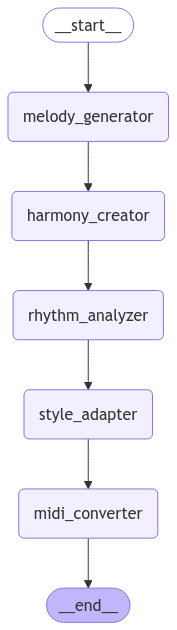

In [38]:
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import display, Image

display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API
        )
    )
)

In [39]:
input = {
    "musician_input":"Write a sorrowful string quartet in C minor",
    "style":"Romantic era"
}

result = app.invoke(input)
print(f"MIDI file saved in {result['midi_file']}")

MIDI file saved in /tmp/tmpmmulakej.mid


In [46]:
!apt install fluidsynth
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2
!fluidsynth -ni font.sf2 /tmp/tmpmmulakej.mid -F ouput.wav -r 44100

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fluidsynth is already the newest version (2.2.5-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
FluidSynth runtime version 2.2.5
Copyright (C) 2000-2022 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of Creative Technology Ltd.

Rendering audio to file 'ouput.wav'..


In [48]:
from IPython.display import Audio
Audio("ouput.wav")